In [4]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('data/gurgaon_properties(missing_value_imputation).csv')

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.29,9021.0,3,3,3,7.0,Relatively New,1540.0,1,0,0,0,0,2,174
1,flat,ireo the grand arch,sector 58,2.20,16000.0,2,2,1,5.0,Relatively New,1528.0,0,0,0,1,0,1,49
2,flat,ireo victory valley,sector 67,2.95,12110.0,3,3,3+,14.0,Moderately Old,2236.0,0,1,0,1,0,1,165
3,flat,puri emerald bay,sector 104,2.23,9911.0,3,4,3+,10.0,Relatively New,2360.0,0,1,0,0,0,1,159
4,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Relatively New,1548.0,0,0,0,0,0,2,0


In [7]:
df.shape

(3603, 18)

In [8]:
latlong = pd.read_csv('../gurgaon_sectors_coordinates.csv')

In [9]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [10]:
# splitting coordinates into latitude and longitude
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [11]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [12]:
# merging both the dataset
new_df = df.merge(latlong, on='sector')

In [13]:
# exporting the dataset
new_df.to_csv('../data_visual1.csv', index=False)

## **Visualizaions for Analysis app**

In [14]:
grouped_df = new_df.groupby(by='sector')[['price', 'price_per_sqft','built_up_area','latitude','longitude']].mean()
grouped_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3057.944444,28.4484,77.0210
manesar,0.927667,4263.033333,2050.933333,28.3515,76.9428
sector 1,1.282000,7788.600000,1894.000000,28.3663,76.9456
sector 102,1.681327,10641.053097,1546.176991,28.4750,76.9715
sector 103,1.402727,7440.977273,1739.340909,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.920481,5886.644231,1562.722885,28.4079,76.9153
sector 93,0.808182,8516.363636,941.272727,28.4153,76.9326
sector 95,0.486610,5595.305085,1011.881356,28.4172,76.9081


In [15]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

# Ensure your dataframe, grouped_df, contains 'latitude', 'longitude', 'price_per_sqft', and 'built_up_area' columns

fig = px.scatter_mapbox(
    grouped_df,
    lat='latitude',
    lon='longitude',
    color='price_per_sqft',
    size='built_up_area',
    color_continuous_scale=px.colors.cyclical.IceFire,
    mapbox_style='open-street-map',
    # projection="natural earth",  # Set a map projection
    text=grouped_df.index  # Optional: text displayed on the points
)

# fig.update_geos(showland=True, landcolor="lightgray")  # Optional: improve map appearance
fig.show()


Observations: -
- Mostly the high price properties are located in the main gurgaon area as that's the area for some big companies.
- Among the old gurgaon area, some properties are having price range between 10k to 17k Cr because they are located in area near to delhi.


In [16]:
df1 = pd.read_csv('data/gurgaon_properties.csv')

In [17]:
df1.head()

,property_name,property_type,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,6 Bedroom House for sale in Sector 50 Gurgaon,house,independent,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,"pooja room,study room,servant room,others","Sector 50 Gurgaon, Gurgaon, Haryana",2.0,not available,0 to 1 Year Old,"['Standard chartered ATM', 'Icici bank ATM', '...",This 6 bhk house for sale in sector 50 gurgaon...,"['1 Fan', '1 Exhaust Fan', '1 Dining Table', '...",NaN,"['Environment5 out of 5', 'Lifestyle5 out of 5..."
1,3 BHK Flat in Sector 90 Gurgaon,flat,dlf regal gardens,1.29,1430.0,9020.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,study room,"E174, Sector 90 Gurgaon, Gurgaon, Haryana",7.0,East,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT...",Looking for a 3 bhk property for sale in gurga...,NaN,"['Centrally Air Conditioned', 'Water purifier'...","['Green Area5 out of 5', 'Construction4.5 out ..."
2,2 BHK Flat in sector 58 Gurgaon,flat,ireo the grand arch,2.20,1375.0,16000.0,Carpet area: 1375 (127.74 sq.m.),2,2,1,pooja room,"B-503, sector 58 Gurgaon, Gurgaon, Haryana",5.0,East,1 to 5 Year Old,"['Sector 55-56 Rapid Metro', 'Paras Trinity Ma...",This 2 bhk apartment is available for sale in ...,"['6 Fan', '1 Exhaust Fan', '3 Geyser', '5 Ligh...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction5 out of..."
3,3 BHK Flat in Sector 67 Gurgaon,flat,ireo victory valley,2.95,2436.0,12110.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,"servant room,pooja room","Near To Sector 56 Rapid Metro Station Gurgaon,...",14.0,South,5 to 10 Year Old,"['AIPL Joy Street Mall', 'Golf Course Extensio...",An excellent 3 bhk residential apartment is fo...,"['3 Wardrobe', '15 Fan', '1 Exhaust Fan', '5 G...","['Water purifier', 'Centrally Air Conditioned'...","['Green Area5 out of 5', 'Construction4 out of..."
4,3 BHK Flat in Sector 104 Gurgaon,flat,puri emerald bay,2.23,2250.0,9911.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,servant room,"10th, Sector 104 Gurgaon, Gurgaon, Haryana",10.0,East,1 to 5 Year Old,"['Sector-21 Metro Dwarka', 'Gurgaon Dreamz Mal...",This beautiful 3 bhk flat in sector 104 gurgao...,"['5 Fan', '1 Exhaust Fan', '16 Light', '5 AC',...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area5 out of 5', 'Construction5 out of..."


In [18]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [19]:
wordcloud_df.head()

,features,sector
0,NaN,sector 90
1,"['Centrally Air Conditioned', 'Water purifier'...",sector 58
2,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 67
3,"['Water purifier', 'Centrally Air Conditioned'...",sector 104
4,"['Centrally Air Conditioned', 'Water purifier'...",sector 108


In [20]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [21]:
main

['Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Water softening plant',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Water purifier',
 'Centrally Air Conditioned',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Co

In [22]:
from wordcloud import WordCloud

In [23]:
feature_text = ' '.join(main)

In [24]:
import pickle
pickle.dump(feature_text, open('../feature_text.pkl', 'wb'))

In [25]:
feature_text

'Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Water purifier Centrally Air Conditioned Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Att

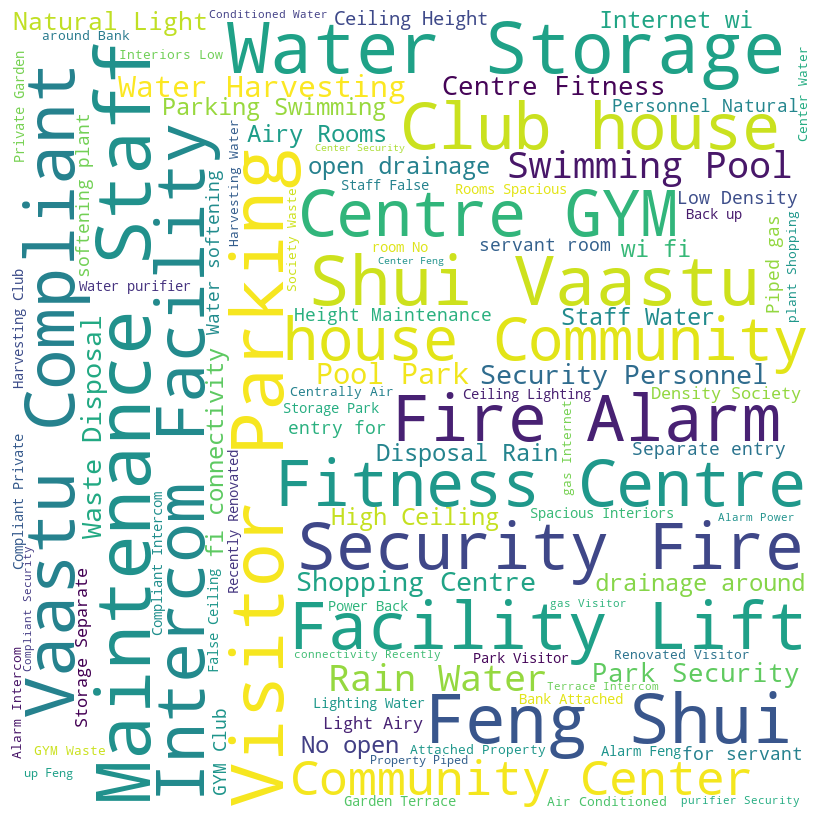

In [26]:
plt.rcParams['font.family'] = 'Arial'

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(['s']),
                      min_font_size=10).generate(feature_text)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [28]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()